In [3]:
from datasets import load_dataset

ds = load_dataset("batuhanmtl/job-skill-set")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
print(ds)

DatasetDict({
    train: Dataset({
        features: ['job_id', 'category', 'job_title', 'job_description', 'job_skill_set'],
        num_rows: 1167
    })
})


In [5]:
import pandas as pd 
from sklearn.metrics.pairwise import cosine_similarity 
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer 

ds = load_dataset("batuhanmtl/job-skill-set")
df = pd.DataFrame(ds["train"])

df_skills = df["job_skill_set"].astype(str).str.replace(r"[\[\]']", "", regex=True)
vectorizer = CountVectorizer(token_pattern=r"[^,]+")
X = vectorizer.fit_transform(df_skills)

skill_similarity = cosine_similarity(X.T)
skill_names = vectorizer.get_feature_names_out()


def top_skills(skill_name, top_n=10):
    if skill_name not in skill_names:
        return f"Skill '{skill_name}' is not found"

    idx = list(skill_names).index(skill_name)
    sims = skill_similarity[idx]

   
    similar_indices = sims.argsort()[::-1][1:top_n+1]
    similar_scores = sims[similar_indices]

    results = pd.DataFrame({
        "skill": skill_names[similar_indices],
        "similarity": similar_scores
    })

    return results
print(top_skills("talent acquisition", top_n=10))


                              skill  similarity
0             coaching facilitation    0.408248
1           coaching and mentorship    0.408248
2                  ethical judgment    0.408248
3   compliance with employment laws    0.408248
4                     survey design    0.408248
5            hr certification (e.g.    0.408248
6   employment laws and regulations    0.288675
7                     ms powerpoint    0.288675
8                   union relations    0.288675
9   employee performance management    0.288675


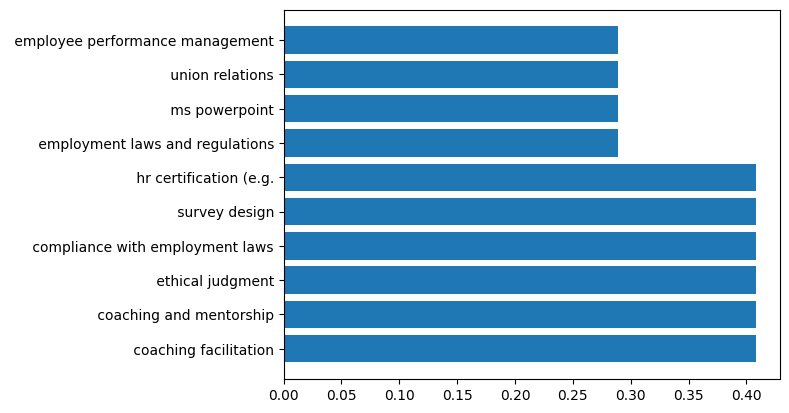

In [6]:
results = top_skills("talent acquisition", top_n=10)
plt.barh(results["skill"], results["similarity"])
plt.show()

In [15]:
import numpy as np 
job_similarity = cosine_similarity(X)

def top_similar_jobs(job_index, top_n=10):
    sims = job_similarity[job_index]
    similar_indices = np.argsort(sims)[::-1][1:top_n+1]  
    similar_scores = sims[similar_indices]

    results = df.iloc[similar_indices][["job_title", "job_skill_set"]].copy()
    results["similarity"] = similar_scores
    results = results[["job_title","similarity"]]
    return results
target_index = 1000
print("Selected Job:",df.iloc[target_index]["job_title"])
top_similar_jobs(target_index, top_n=10).head(10)

Selected Job: Business Development Representative


,job_title,similarity
460,Technical Sales Representative,0.573539
509,Sales Development Trainee,0.486664
1020,Business Development Manager,0.461690
1096,Business Development Manager,0.450564
1152,Business Development Representative,0.432590
648,Sales Representative,0.429198
1157,Business Development Consultant,0.429198
991,Business Development Manager - Audio North Ame...,0.421464
599,Sales Operations Manager,0.414644
932,Business Development Manager,0.410391
